<a href="https://www.kaggle.com/code/nickkatsarelas/data-jobs?scriptVersionId=288285993" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/thousand-ml-jobs-in-usa/1000_ml_jobs_us.csv


In [2]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 7.4 MB/s eta 0:00:00


In [3]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt


import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download("punkt_tab")
nltk.download("stopwords")
nltk.download("wordnet")

import contractions
import string
import re


from textblob import TextBlob
from wordcloud import WordCloud
import spacy

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier

import numpy as np



import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("/kaggle/input/thousand-ml-jobs-in-usa/1000_ml_jobs_us.csv", delimiter=",")
df.head(10)



[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Unnamed: 0,job_posted_date,company_address_locality,company_address_region,company_name,company_website,company_description,job_description_text,seniority_level,job_title
0,0,2024-10-31,Indianapolis,Indiana,Upper Hand,https://upperhand.com,Upper Hand is the leading provider of full-sui...,OverviewUpper Hand is embarking on an exciting...,Internship,Internship - Machine Learning Engineer & Data ...
1,1,2025-03-14,San Francisco,California,Ikigai,https://www.ikigailabs.io,"Built upon years of MIT research, Ikigai is a ...",Company DescriptionThe Ikigai platform unlocks...,Mid-Senior level,Machine Learning Engineer
2,2,2025-04-09,San Jose,CA,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Entry level,Machine Learning Engineer
3,3,2025-03-22,Mountain View,California,Waymo,https://waymo.com/careers/,On the journey to be the world's most trusted ...,Waymo is an autonomous driving technology comp...,Entry level,"Machine Learning Engineer, Training"
4,4,2025-03-28,Boston,Massachusetts,HMH,http://www.hmhco.com,We are an adaptive learning company that empow...,Job Title: Machine Learning EngineerLocation: ...,Mid-Senior level,Machine Learning Engineer
5,5,2025-04-02,San Jose,CA,Adobe,http://www.adobe.com,Adobe is the global leader in digital media an...,Our CompanyChanging the world through digital ...,Internship,2025 Intern - Machine Learning Engineer AI/ML
6,6,2025-03-25,Deerfield,IL,Walgreens,http://www.walgreens.com,Walgreens (www.walgreens.com) is included in t...,Job SummaryApplies advanced data analysis tool...,Not Applicable,Data Scientist - Healthcare & Clinical Data (R...
7,7,2025-03-22,Los Gatos,CA,Netflix,https://jobs.netflix.com?utm_campaign=LIHomePa...,Netflix is one of the world's leading entertai...,Netflix is one of the world's leading entertai...,Not Applicable,Machine Learning Software Engineer (L5) - Cont...
8,8,2025-04-02,Los Gatos,CA,Netflix,https://jobs.netflix.com?utm_campaign=LIHomePa...,Netflix is one of the world's leading entertai...,Netflix is one of the world's leading entertai...,Not Applicable,Machine Learning Engineer (L4/5) - Studio Medi...
9,9,2025-03-12,Pune,Maharashtra,Persistent Systems,http://www.persistent.com,"We are an AI-led, platform-driven Digital Engi...",About PersistentWe are a trusted Digital Engin...,Associate,Machine Learning Engineer


In [4]:
# drop Unnamed: 0
df.drop("Unnamed: 0", inplace=True, axis=1)

print(f"Null Values: {df.isnull().sum()}")
print(f"Duplicated Values: {df.duplicated().sum()}")

Null Values: job_posted_date               0
company_address_locality     47
company_address_region      113
company_name                  0
company_website              14
company_description          12
job_description_text          1
seniority_level               9
job_title                     0
dtype: int64
Duplicated Values: 157


In [5]:
# drop Null Values
df['company_description'] = df['company_description'].fillna("")
df['job_description_text'] = df['job_description_text'].fillna("")
df['job_description_text'] = df['job_description_text'].fillna("")
df['seniority_level'] = df['seniority_level'].fillna("")
df.drop_duplicates(inplace=True)

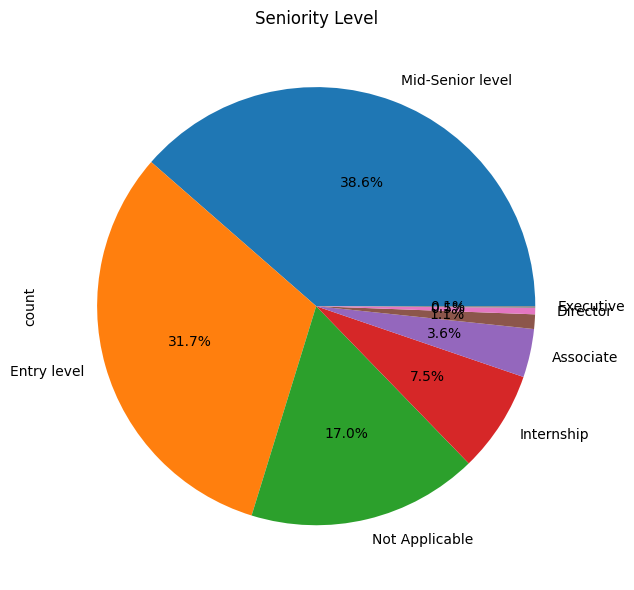

In [6]:
# Seniority level

df['seniority_level'] = df['seniority_level'].fillna("")

plt.figure(figsize=(10,6))
df['seniority_level'].value_counts().plot(kind='pie', autopct="%1.1f%%")
plt.title("Seniority Level")
plt.tight_layout()
plt.show()

In [7]:
# to make the job titles more simple
def clean_titles(title: str):
    """Make the job titles less sporadic.
    
    Args:
        title (str): input text of job_title.
    
    Returns:
        Machine Learning Engineer (str): .
        Data Scientist (str): .
        Software Engineer (str): .
        Other Jobs (str).
    """
    title = str(title)
    if "Machine Learning Engineer" in title:
        return "Machine Learning Engineer"
    elif "Data Scientist" in title:
        return "Data Scientist"
    elif "Software Engineer" in title:
        return "Software Engineer"
    else:
        return "Other Jobs"



# seperate DataFrame for this.
df_jobs = df.copy()
df_jobs['job_title'] = df_jobs['job_title'].apply(clean_titles)

df_jobs['job_title'].value_counts()

job_title
Machine Learning Engineer    540
Software Engineer            144
Data Scientist                97
Other Jobs                    59
Name: count, dtype: int64

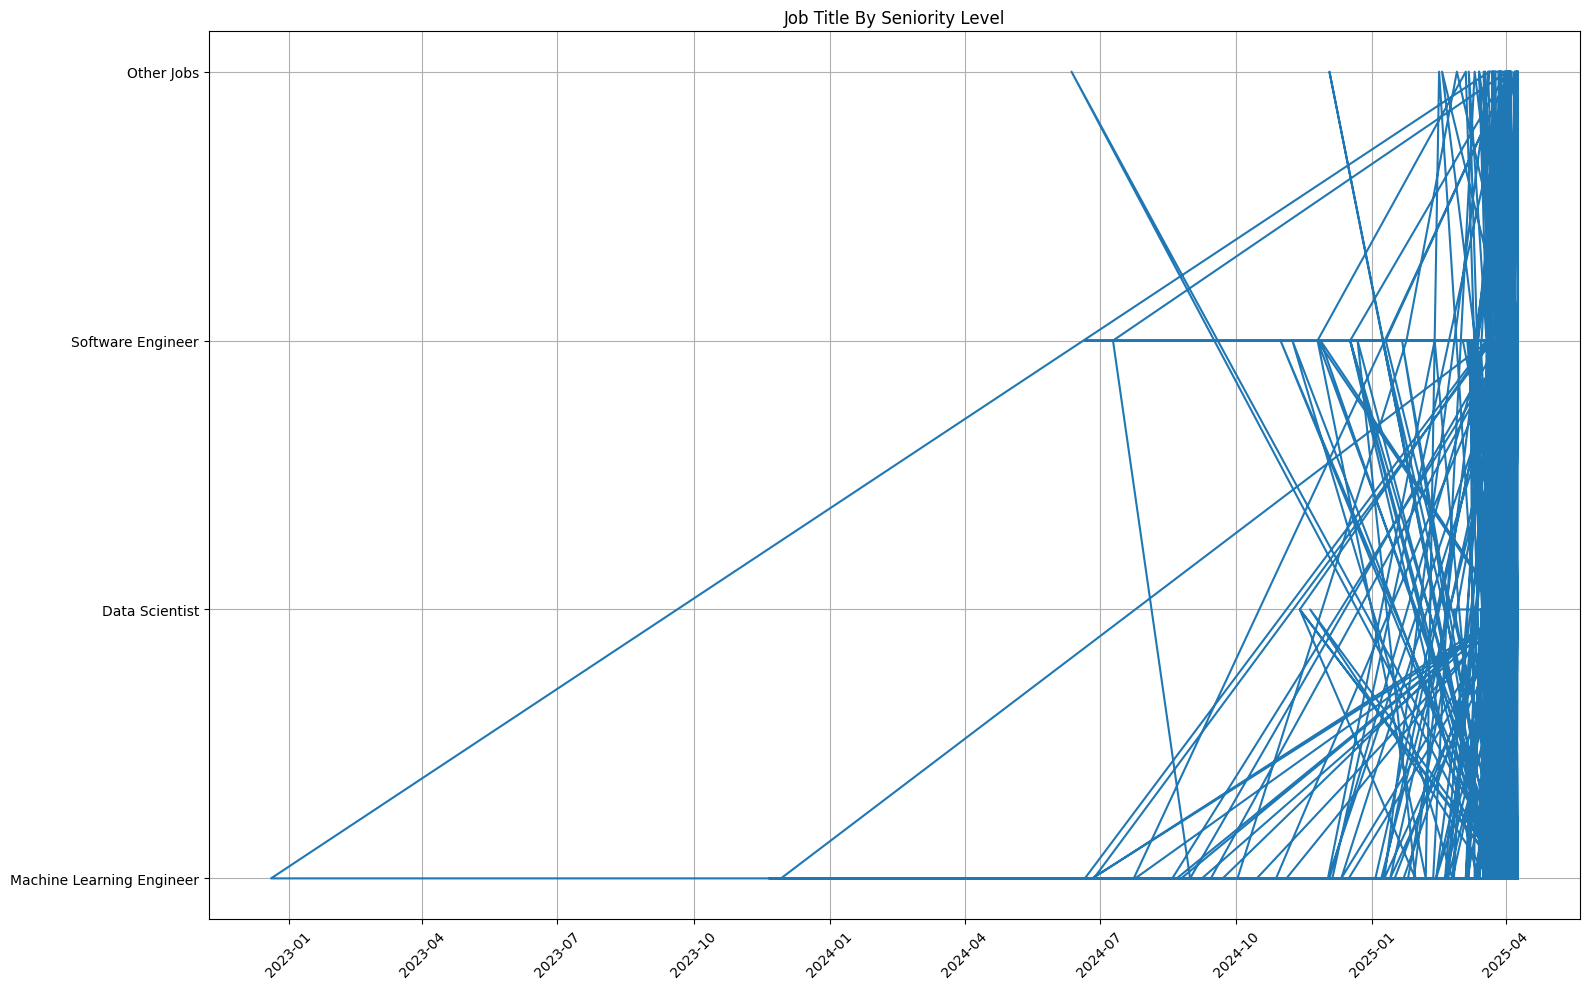

In [8]:
df_jobs['Date'] = pd.to_datetime(df_jobs['job_posted_date'])
df_jobs = df_jobs.set_index('Date')

plt.figure(figsize=(16,10))
plt.plot(df_jobs['job_title'])
plt.title("Job Title By Seniority Level")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [9]:
def clean_text(text: str) -> str:
    """Clean Text Data.
    
    Args: 
        text (str): input text to be standardized.
    
    Returns:
        text (str): Standardized version of input text.
    """
    
    
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text) # remove url tags
    text = contractions.fix(text) # remove contractions
    text = text.translate(str.maketrans('','',string.punctuation)) # removing punctuations
    text = re.sub(r'[^a-zA-Z0-9\s]','',text) # remove special chars
    text = re.sub(r'\d+','',text) # remove hanging numbers
    STOPWORDS = set(stopwords.words("english")) # english stopwords
    tokens = word_tokenize(text) # tokenizing text for clean text variable
    cleaned_tokens = [word for word in tokens if word.lower() not in STOPWORDS]

    text=  " ".join(cleaned_tokens)
    return text



# text
df['job_description_clean'] = df['job_description_text'].apply(clean_text)
df['company_description_clean'] = df['company_description'].apply(clean_text)
df['job_title'] = df['job_title'].apply(clean_titles)


df['job_description_clean'].head(10)

0    overviewupper hand embarking exciting journey ...
1    company descriptionthe ikigai platform unlocks...
2    companychanging world digital experiences adob...
3    waymo autonomous driving technology company mi...
4    job title machine learning engineerlocation re...
5    companychanging world digital experiences adob...
6    job summaryapplies advanced data analysis tool...
7    netflix one worlds leading entertainment servi...
8    netflix one worlds leading entertainment servi...
9    persistentwe trusted digital engineering enter...
Name: job_description_clean, dtype: object

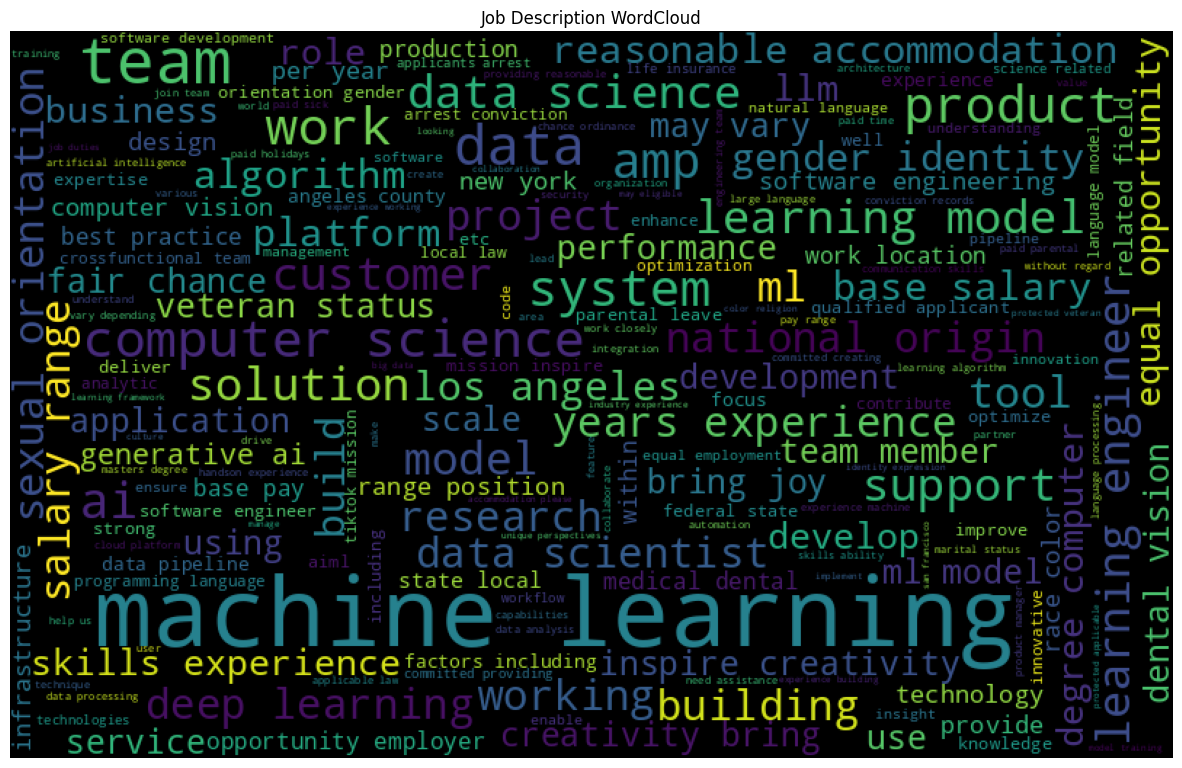

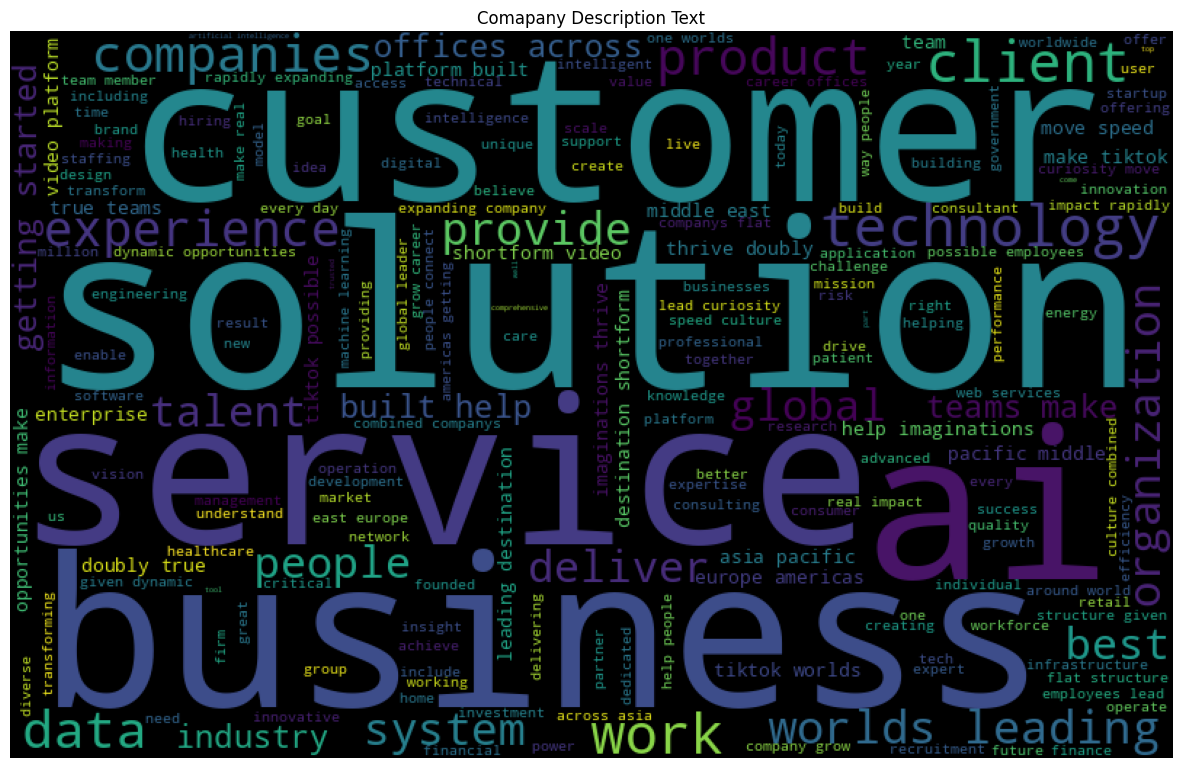

In [10]:
# word cloud for each

job_desc_txt = " ".join(i for i in df['job_description_clean'].astype(str))
company_desc_txt = " ".join(i for i in df['company_description_clean'].astype(str))

plt.figure(figsize=(15,10))
wc = WordCloud(height=500, width=800).generate(job_desc_txt)
plt.title("Job Description WordCloud")
plt.axis("off")
plt.imshow(wc)
plt.show()

plt.figure(figsize=(15,10))
wc = WordCloud(height=500, width=800).generate(company_desc_txt)
plt.title("Comapany Description Text")
plt.axis("off")
plt.imshow(wc)
plt.show()

In [11]:
# most common words in job description
nltk.FreqDist(TextBlob(job_desc_txt).words).most_common(50)

[('data', 4045),
 ('learning', 3777),
 ('experience', 3283),
 ('machine', 3089),
 ('work', 2358),
 ('team', 2136),
 ('models', 1885),
 ('ai', 1756),
 ('ml', 1603),
 ('including', 1452),
 ('engineering', 1350),
 ('skills', 1279),
 ('systems', 1166),
 ('science', 1149),
 ('business', 1131),
 ('role', 1130),
 ('company', 1099),
 ('software', 1096),
 ('development', 1088),
 ('model', 1065),
 ('solutions', 1036),
 ('new', 1022),
 ('product', 1013),
 ('benefits', 1006),
 ('may', 1002),
 ('range', 994),
 ('computer', 983),
 ('us', 963),
 ('opportunity', 933),
 ('teams', 923),
 ('employees', 914),
 ('years', 889),
 ('building', 862),
 ('across', 856),
 ('build', 840),
 ('working', 834),
 ('technical', 826),
 ('one', 810),
 ('information', 786),
 ('design', 776),
 ('employment', 775),
 ('time', 772),
 ('help', 761),
 ('position', 761),
 ('engineer', 758),
 ('status', 745),
 ('paid', 738),
 ('amp', 728),
 ('tools', 727),
 ('python', 727)]

In [12]:
# most common words in company description text

nltk.FreqDist(TextBlob(company_desc_txt).words).most_common(50)

[('company', 426),
 ('technology', 404),
 ('solutions', 368),
 ('help', 359),
 ('ai', 347),
 ('across', 344),
 ('make', 314),
 ('services', 310),
 ('data', 306),
 ('platform', 296),
 ('people', 268),
 ('world', 259),
 ('leading', 254),
 ('business', 252),
 ('customers', 246),
 ('global', 232),
 ('us', 225),
 ('digital', 223),
 ('team', 215),
 ('teams', 204),
 ('worlds', 199),
 ('new', 195),
 ('mission', 188),
 ('work', 187),
 ('talent', 187),
 ('clients', 185),
 ('opportunities', 176),
 ('tiktok', 175),
 ('best', 161),
 ('one', 161),
 ('every', 158),
 ('companies', 157),
 ('grow', 157),
 ('build', 154),
 ('products', 151),
 ('businesses', 149),
 ('employees', 146),
 ('career', 142),
 ('offices', 142),
 ('impact', 136),
 ('create', 128),
 ('experience', 126),
 ('possible', 125),
 ('rapidly', 125),
 ('move', 124),
 ('started', 124),
 ('built', 123),
 ('software', 120),
 ('experiences', 119),
 ('real', 115)]

In [13]:
# spacy Name-Entity recognition

nlp = spacy.load("en_core_web_sm")

doc_job_desc = nlp(job_desc_txt[:30000])
doc_company_desc = nlp(company_desc_txt[:20000])

for ent in doc_job_desc.ents:
    print(ent.text, ent.label_)
    



today DATE
three CARDINAL
years DATE
engineeringapache arrow dremio raymiscellaneousgit jupyterhub apache ORG
years DATE
keras tensorflow PERSON
today DATE
ubs believe power ORG
phd CARDINAL
years DATE
colorado GPE
colorado GPE
colorado GPE
annually DATE
thousands CARDINAL
one million CARDINAL
tens millions miles QUANTITY
tens billions CARDINAL
years DATE
annual DATE
houghton mifflin PERSON
jenkins github PERSON
phd degree PERSON
december june DATE
one CARDINAL
java PERSON
one CARDINAL
learnstrong GPE
hourly TIME
millions CARDINAL
every day year DATE
europe LOC
latin america LOC
thousands CARDINAL
eight CARDINAL
degree least years DATE
netflix GPE
one CARDINAL
million CARDINAL
netflix GPE
annual DATE
year DATE
hourly TIME
annually DATE
less days DATE
netflix GPE
one CARDINAL
million CARDINAL
cv andor PERSON


In [14]:
# Tfid Vectorizer

df['text'] = df['company_description_clean'] + df['job_description_clean']

tfid = TfidfVectorizer()
le = LabelEncoder()


X = df['text']
y = df['job_title']
y = le.fit_transform(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

X_train_tfid = tfid.fit_transform(X_train).toarray()
X_test_tfid = tfid.transform(X_test).toarray()

In [16]:
# training



models = {
"multinomialnaivebayes":MultinomialNB(),
"logisticregression":LogisticRegression(),
"gausianNB":GaussianNB(),
"randomforestclf":RandomForestClassifier(),
}



for model_name,model in models.items():
    model.fit(X_train_tfid,y_train)
    y_pred = model.predict(X_test_tfid)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test,y_pred,average="weighted")
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    acc = accuracy_score(y_test, y_pred)
    print(f"Model: {model}")
    print(f"Precision Score: {precision:.4f}")
    print(f"Recall Score: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Accuracy Score: {acc:.2f}")

Model: MultinomialNB()
Precision Score: 0.4210
Recall Score: 0.6488
F1 Score: 0.5106
Accuracy Score: 0.65
Model: LogisticRegression()
Precision Score: 0.7801
Recall Score: 0.7321
F1 Score: 0.6680
Accuracy Score: 0.73
Model: GaussianNB()
Precision Score: 0.5932
Recall Score: 0.6488
F1 Score: 0.5976
Accuracy Score: 0.65
Model: RandomForestClassifier()
Precision Score: 0.7260
Recall Score: 0.7083
F1 Score: 0.6523
Accuracy Score: 0.71


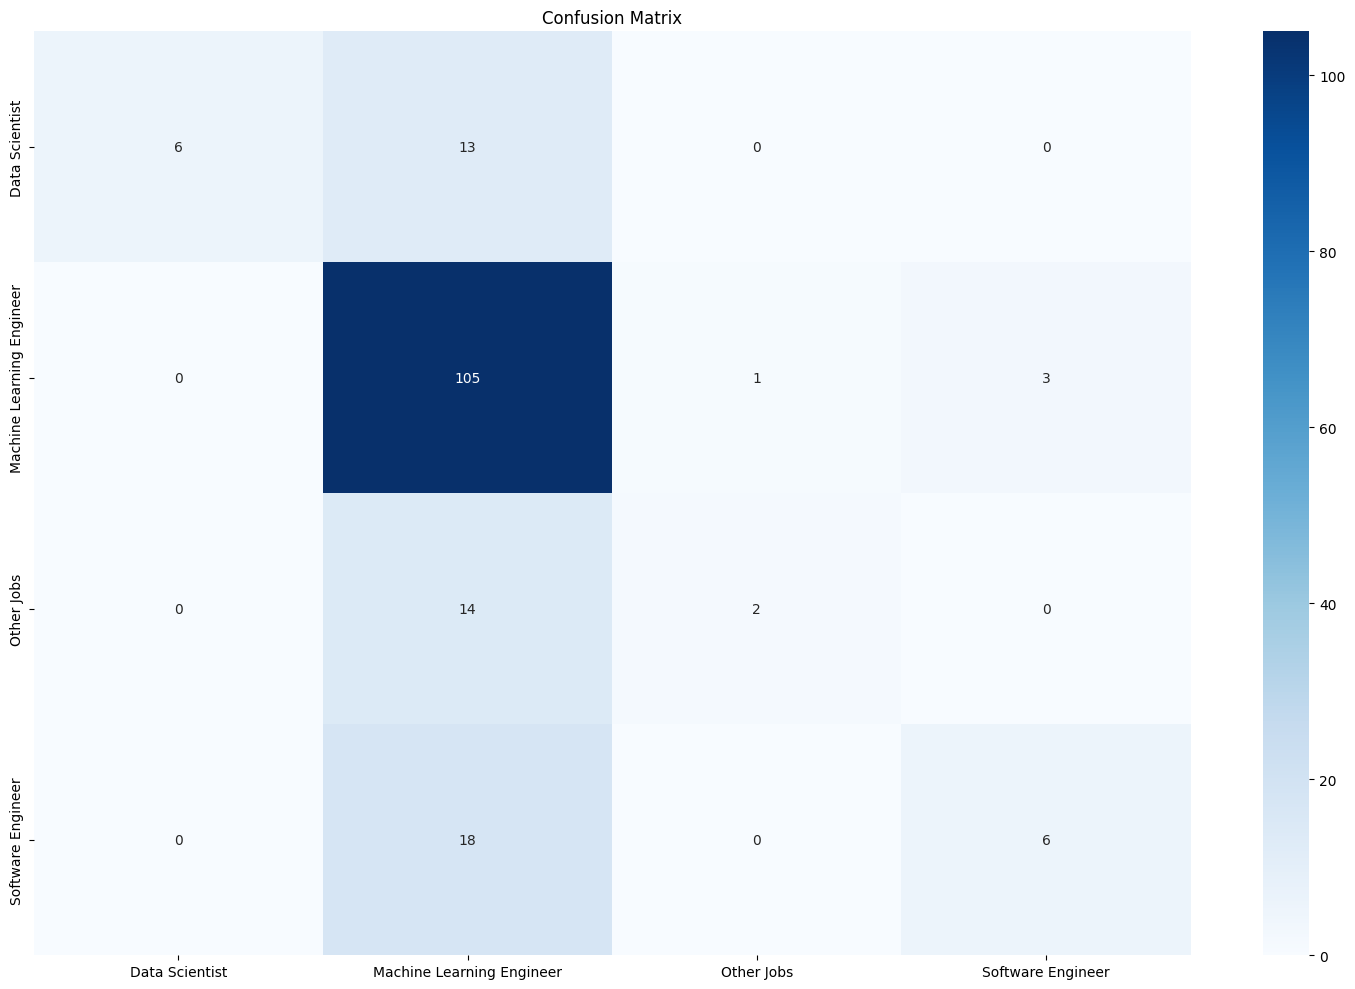

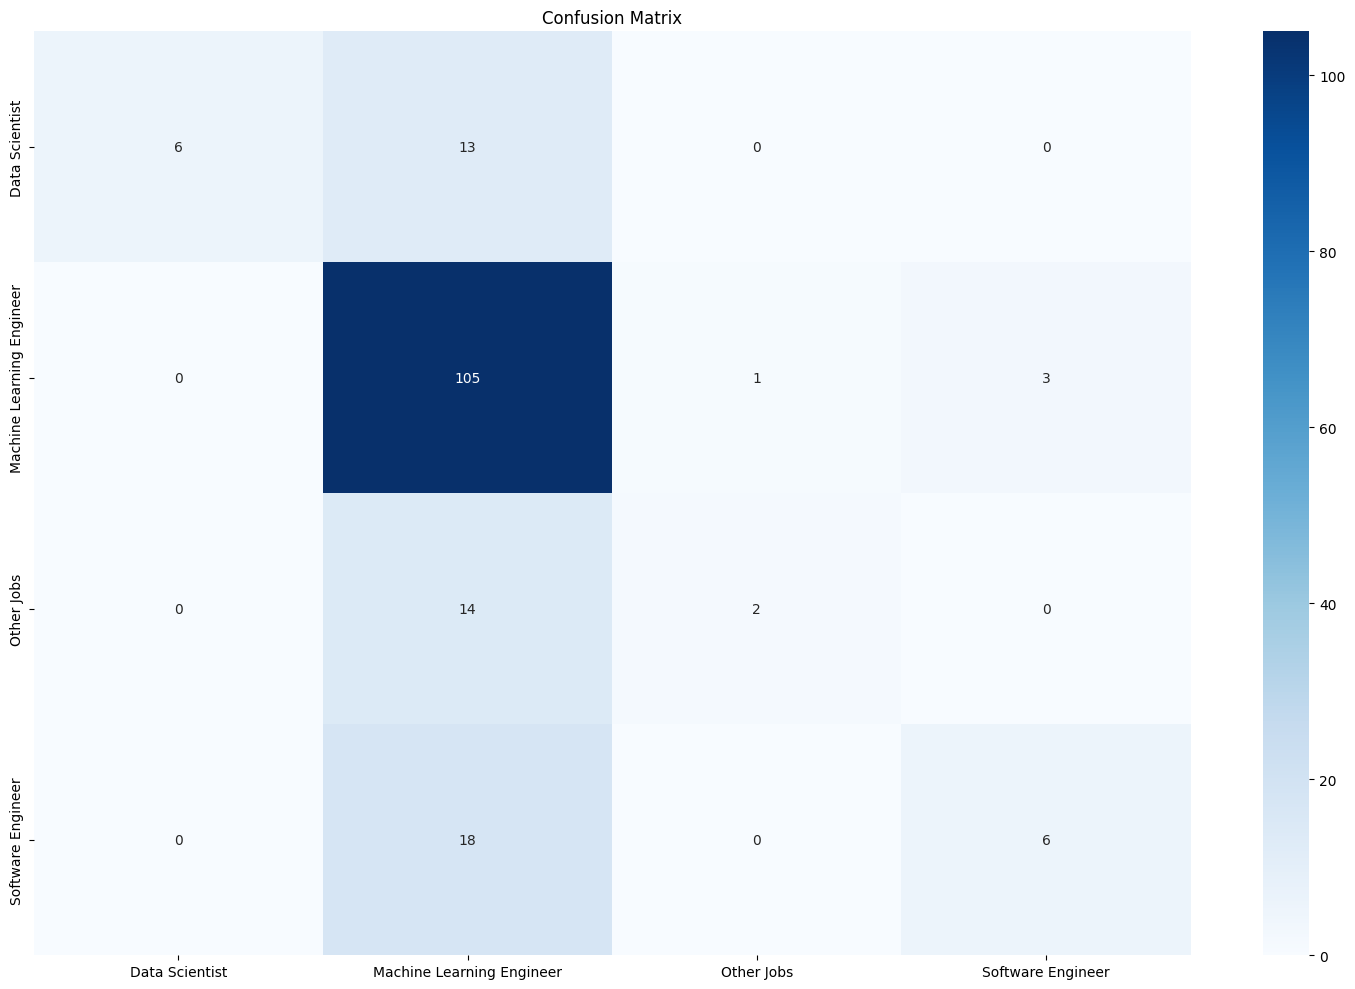

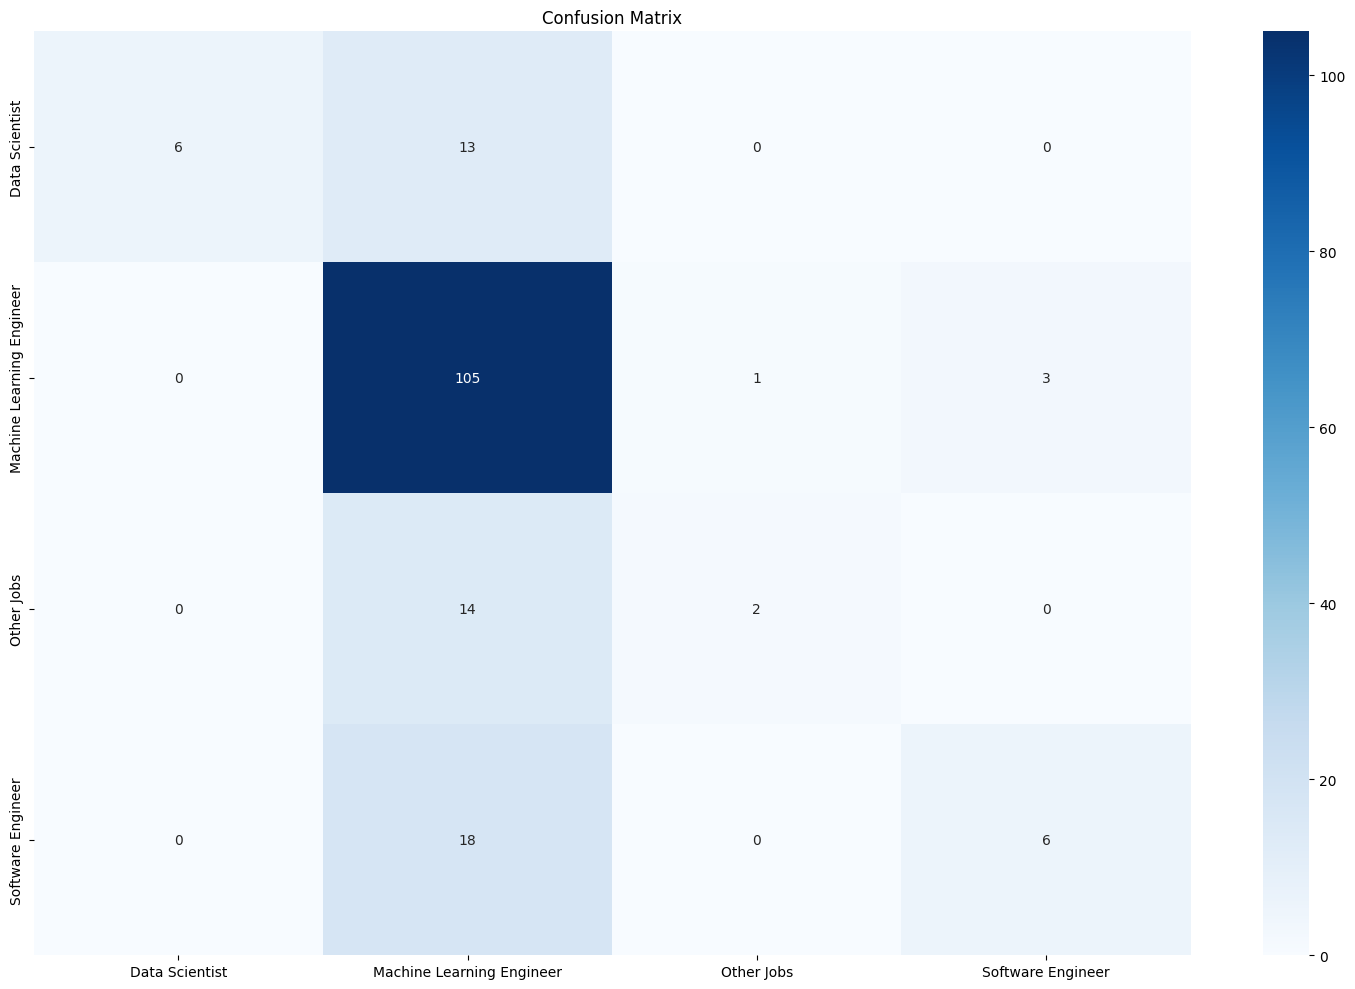

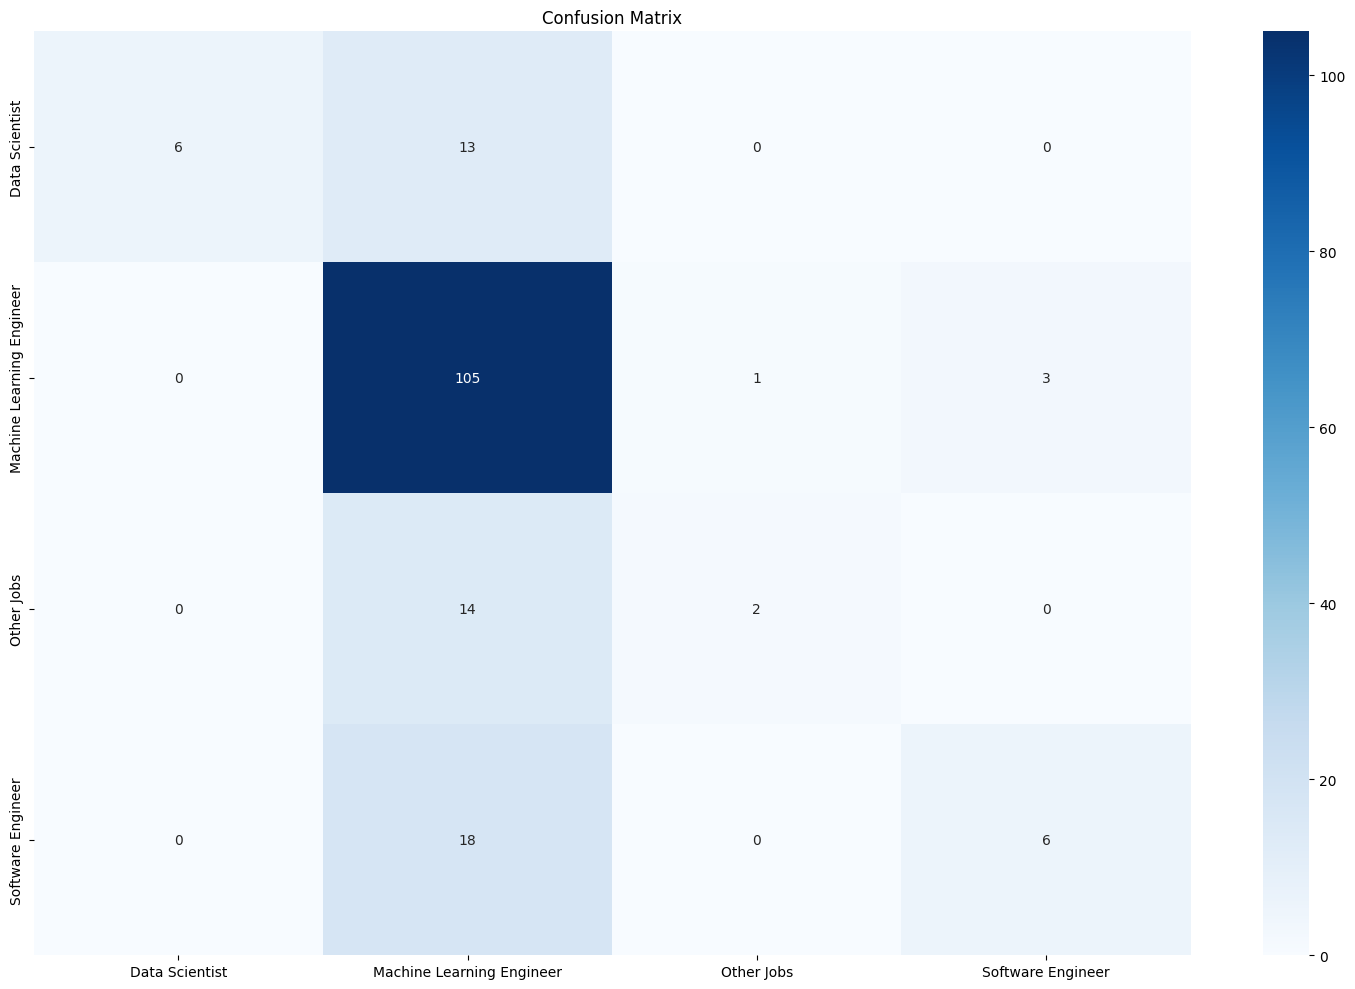

In [17]:
for model_name, model in models.items():
    confmat = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(15,10))
    sns.heatmap(confmat, cmap="Blues", fmt="d", annot=True, xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.show()
    